<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
#finding the average of duration column
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values('duration')



,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

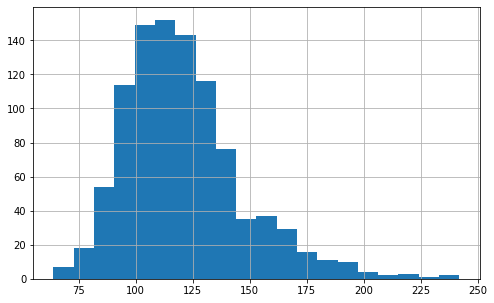

In [317]:
#.hist makes movies['duration'] into a histogram, and then I chose 20 bins
movies['duration'].hist(bins=20, figsize=(8,5));

#### Use a box plot to display that same data.

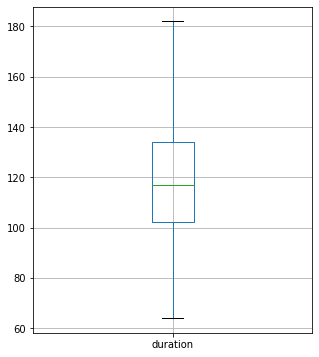

In [324]:
movies.boxplot('duration', showfliers=False, figsize=(5,6));
#boxplot, getting rid of outliers with 'showfliers' argument and setting the figure size 

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

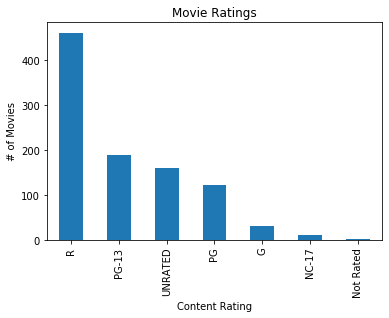

In [326]:
#finding the value counts movies in each content_rating category 
movieshist=movies['content_rating'].value_counts().plot.bar();
#naming labels
movieshist.set_xlabel('Content Rating')
movieshist.set_ylabel('# of Movies')
movieshist.set_title('Movie Ratings')
movieshist;

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [327]:
#replace values with replace(to_replace=[],) will rename those values
movies=movies.replace(to_replace=['NOT RATED','PASSED','APPROVED','GP'],value='UNRATED')


In [12]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
#renaming the rest with the same method. 
movies=movies.replace(to_replace=['X','TV-MA'],value="NC-17")
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
#checking the null values in each column and summing each column
null_movies=movies.isnull().sum()
null_movies



star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
#replacing null values with 'not rated'
#inplace is the equivalent to movies = movies.fillna()

movies.fillna(value='Not Rated', inplace=True)
#checking null values to make sure it worked
movies.isnull().sum()


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
#longer
longer = movies[movies['duration']>120]['star_rating']
longer.mean()

#I found all the movies greater than 120mins, then looked at the dataframe with only those movies and their star ratings. 
#then I found the mean of that series, 7.953

7.953669724770622

In [17]:
#shorter 
shorter = movies[movies['duration']<120]['star_rating']
shorter.mean()

#same thing as longer, but for movies shorter than 120mins. 

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

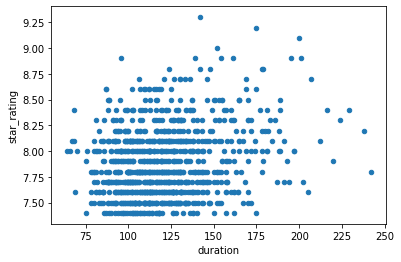

In [18]:
#Here I plotted a scatter plot with both on different axis to see if there is a correlation. Scatter plots 
#are generally used to show the correlation between two 
movies.plot(kind='scatter',x='duration',y='star_rating');

#plotting them against each other, it does not seem to have a strong correlation

#### Calculate the average duration for each genre.

In [19]:
movies.groupby('genre')['duration'].mean()

#I grouped movies by genre, which organized the dataframe based on genre 
#from here, I pulled out only the duration column
#from here, I found the mean of each 'group'

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0.5, 1.0, 'Content Ratings vs Duration')

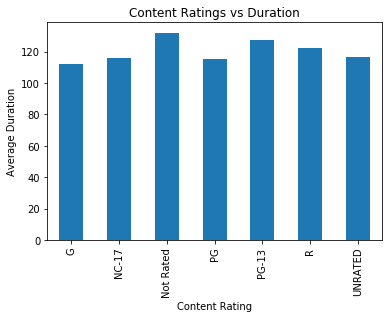

In [20]:
content_duration=movies.groupby('content_rating')['duration'].mean().plot(kind='bar');
content_duration.set_xlabel('Content Rating')
content_duration.set_ylabel('Average Duration')
content_duration.set_title('Content Ratings vs Duration')

#after attempting a line graph, I found that difficult to read with a large set. 
#by grouping movies by content_rating, and pulling out duration, I was able to find the mean 
#then, I turned this into a simple bar graph by adding .plot()


#### Determine the top rated movie (by star rating) for each genre.

In [21]:
#grouping movies by the genre column and then picking out the star rating, then title
#then finding the max
movies.groupby('genre')['star_rating','title'].max()


,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
movies[movies.duplicated(subset=('title'),keep=False)]

#using ?movies.duplicated(), the two accepted arguments are subset and keep 
#the subset in this case is  title, since we are looking for duplicates in title 
#keep=False so it would not remove/mark duplicates as false. 
#the serach showed that the films are not duplicates, but remakes 

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,Not Rated,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [23]:
#to find the genres with more than 10 movies
movies['genre'].value_counts()>10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

#### Option 1: manually create a list of relevant genres, then filter using that list

In [24]:
#in the precursor to option 1, I found all of the genres more than ten movies, and manually created a list. 
movies_list=['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
#movies['genre'].isin(movies_list) would return whether or not movie in the movies dataframe 
#matched a genre in the manual list
movies_10=movies[movies['genre'].isin(movies_list)]
#grouping by genre, we can find the avg star_rating of each group 
movies_10.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [25]:
genres = movies['genre'].value_counts()
#genres[genres>10] puts the genres with a value count greater than 10 into a dataframe. 
#from there we can grab the index and (optionally) put it into a list with to_list()
atleast_10=genres[genres>10].index.to_list()
#then we grab all the movies with a genre in atleast_ten with .isin() 
#then we regroup by genre, pull out the star_rating column, and find the mean per genre. 
movies[movies['genre'].isin(atleast_10)].groupby('genre')['star_rating'].mean()



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series


In [83]:
avg_star=movies.groupby('genre')['star_rating'].mean()
greater_10=movies['genre'].value_counts()>10

avg_star[greater_10]

#first I found the mean of for each of the genres (avg_star), returning a series 
#then I found boolean values for if there was more than 10 movies per genre (T/F)
#then I filtered the avg_star dataframe with greater_10 boolean values. 


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [87]:
avg_star=movies.groupby('genre')['star_rating'].mean()
counts=movies['genre'].value_counts()

avg_star[counts>10]

#similar to above, I made avg_star the average of each genre's star_rating
#then I made a count which would count the number of films in each genre
#then I filtered with counts>10 in the avg_star dataframe. 

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [294]:
actors=[]
for i in range(len(movies['actors_list'])):
    interesting = movies['actors_list'][i].replace("u","").replace("]","").replace("[","").replace("'","").replace('""',"").split(',')
    for m in interesting: 
        actors.append(m)

all_actors = pd.Series(actors)
counts=all_actors.value_counts()
counts
#found that robert de niro is the actor in the most movies (13) by cleaning the list and 
# separating values by 'split'



Robert De Niro      13
Tom Hanks           12
Clint Eastwood      11
Johnny Depp         10
Al Pacino           10
                    ..
 John Gielgd         1
 Angela Bassett      1
 Jason Cope          1
 Andrew Garfield     1
 Matt Stone          1
Length: 2010, dtype: int64

In [302]:
#now I want to find the films where robert di nero is in the actors list 
#first I make an empty list outside of the loop 
robert=[]
#using the same setup, I loop through the actors_list to clean it up and saved it under 'interesting'
#interesting would give us a list of lists 
for a in range(len(movies['actors_list'])):
    interesting = movies['actors_list'][a].replace("u","").replace("]","").replace("[","").replace("'","").replace('""',"").split(',')
    type(interesting)
    
#then I looped through 'interesting', and if robert's name was found in it, then it would append the index # from movies
    for b in interesting:
        if "Robert De Niro" in interesting: 
           robert.append(a)
#now robert is a list with all of the index numbers containing the correct movies 
#by adding .unique(), we avoid duplicates 
robertindex=pd.Series(robert).unique()
#then using .loc, we can locate all of the movies that Robert is in. 
movies.loc[robertindex,:]

        
        
        

,star_rating,title,content_rating,genre,duration,actors_list
18,8.7,Goodfellas,R,Biography,146,"[u'Robert De Niro', u'Ray Liotta', u'Joe Pesci']"
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
92,8.4,Taxi Driver,R,Crime,113,"[u'Robert De Niro', u'Jodie Foster', u'Cybill ..."
124,8.3,Raging Bull,R,Biography,129,"[u'Robert De Niro', u'Cathy Moriarty', u'Joe P..."
156,8.2,Casino,R,Biography,178,"[u'Robert De Niro', u'Sharon Stone', u'Joe Pes..."
166,8.2,The Deer Hunter,R,Drama,182,"[u'Robert De Niro', u'Christopher Walken', u'J..."
571,7.8,A Bronx Tale,R,Crime,121,"[u'Robert De Niro', u'Chazz Palminteri', u'Lil..."
579,7.8,Awakenings,PG-13,Biography,121,"[u'Robert De Niro', u'Robin Williams', u'Julie..."
580,7.8,The King of Comedy,PG,Comedy,109,"[u'Robert De Niro', u'Jerry Lewis', u'Diahnne ..."
780,7.6,Midnight Run,R,Action,126,"[u'Robert De Niro', u'Charles Grodin', u'Yaphe..."
